In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as mp
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [9]:
dataset = pd.read_csv("hotel_bookings.csv")
#read the dataset
dataset.head()
#get first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
dt = dataset.isna().sum()
dt = dt[dt != 0] 
#find null values

In [11]:
dataset.fillna({'country':'Unknown'},inplace= True)
dataset.fillna({'children':0.0}, inplace = True)
dataset.fillna({'company':0.0}, inplace = True)
dataset.fillna({'agent':0.0}, inplace = True)
# convert the null values to 0.0

<AxesSubplot:xlabel='hotel', ylabel='is_canceled'>

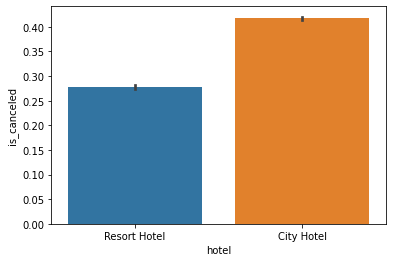

In [12]:
sns.barplot(x = 'hotel', y = 'is_canceled', data = dataset)

<AxesSubplot:xlabel='arrival_date_month', ylabel='is_canceled'>

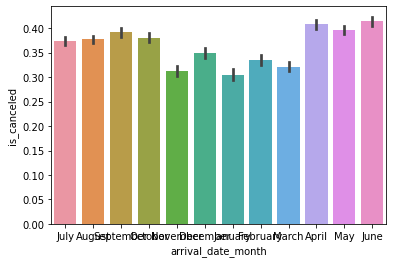

In [13]:
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = dataset)

<AxesSubplot:xlabel='arrival_date_year', ylabel='is_canceled'>

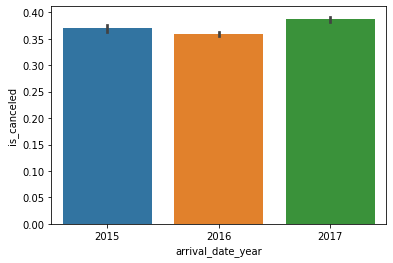

In [14]:
sns.barplot(x = 'arrival_date_year', y = 'is_canceled', data = dataset)

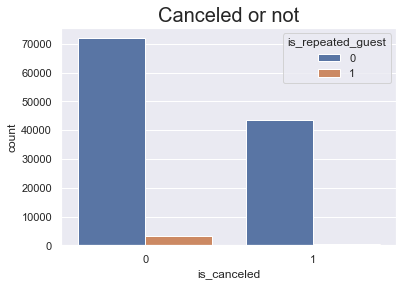

In [15]:
sns.set(style = "darkgrid")
mp.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = dataset)

<AxesSubplot:xlabel='children', ylabel='is_canceled'>

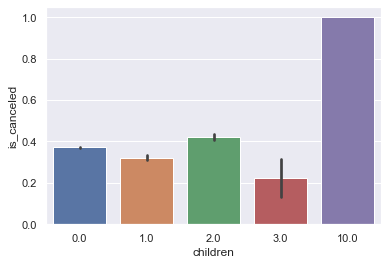

In [16]:
sns.barplot(x = 'children', y = 'is_canceled', data = dataset)

<AxesSubplot:xlabel='babies', ylabel='is_canceled'>

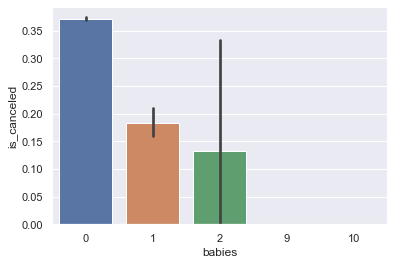

In [17]:
sns.barplot(x = 'babies', y = 'is_canceled', data = dataset)

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

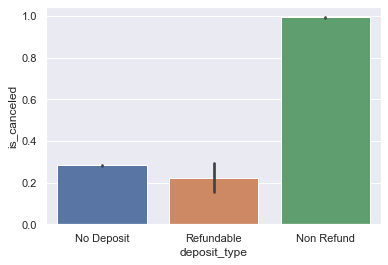

In [18]:
sns.barplot(x = 'deposit_type', y = 'is_canceled', data = dataset)

<AxesSubplot:xlabel='total_of_special_requests', ylabel='is_canceled'>

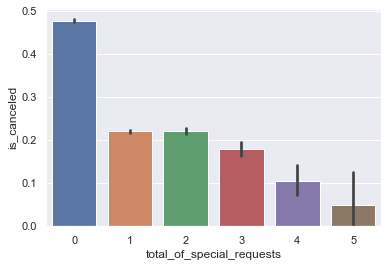

In [19]:
sns.barplot(x = 'total_of_special_requests', y = 'is_canceled', data = dataset)

In [20]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [21]:
dataset[['children', 'agent', 'company','adr']] = dataset[['children', 'agent', 'company','adr']].astype('int64') 
#convert float to int

In [22]:
le = LabelEncoder()
dataset['hotel']=le.fit_transform(dataset['hotel'])
dataset['arrival_date_month']=le.fit_transform(dataset['arrival_date_month'])
dataset['meal']=le.fit_transform(dataset['meal'])
dataset['country']=le.fit_transform(dataset['country'])
dataset['market_segment']=le.fit_transform(dataset['market_segment'])
dataset['distribution_channel']=le.fit_transform(dataset['distribution_channel'])
dataset['reserved_room_type']=le.fit_transform(dataset['reserved_room_type'])
dataset['assigned_room_type']=le.fit_transform(dataset['assigned_room_type'])
dataset['deposit_type']=le.fit_transform(dataset['deposit_type'])
dataset['customer_type']=le.fit_transform(dataset['customer_type'])
dataset['reservation_status']=le.fit_transform(dataset['reservation_status'])
dataset['reservation_status_date']=le.fit_transform(dataset['reservation_status_date'])
#convert categorical columns from object to int with LabelEncoder
dataset.info()
dataset.value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119390 non-null  int32
 1   is_canceled                     119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   arrival_date_year               119390 non-null  int64
 4   arrival_date_month              119390 non-null  int32
 5   arrival_date_week_number        119390 non-null  int64
 6   arrival_date_day_of_month       119390 non-null  int64
 7   stays_in_weekend_nights         119390 non-null  int64
 8   stays_in_week_nights            119390 non-null  int64
 9   adults                          119390 non-null  int64
 10  children                        119390 non-null  int64
 11  babies                          119390 non-null  int64
 12  meal                            119390 non-n

<bound method DataFrame.value_counts of         hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   5   
1           1            0        737               2015                   5   
2           1            0          7               2015                   5   
3           1            0         13               2015                   5   
4           1            0         14               2015                   5   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   1   
119386      0            0        102               2017                   1   
119387      0            0         34               2017                   1   
119388      0            0        109               2017                   1   
119389      0            0        205               2017                   1   


In [23]:
dataset[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date']]=dataset[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date']].astype('int64') 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119390 non-null  int64
 1   is_canceled                     119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   arrival_date_year               119390 non-null  int64
 4   arrival_date_month              119390 non-null  int64
 5   arrival_date_week_number        119390 non-null  int64
 6   arrival_date_day_of_month       119390 non-null  int64
 7   stays_in_weekend_nights         119390 non-null  int64
 8   stays_in_week_nights            119390 non-null  int64
 9   adults                          119390 non-null  int64
 10  children                        119390 non-null  int64
 11  babies                          119390 non-null  int64
 12  meal                            119390 non-n

In [24]:
x= dataset[['hotel', 'deposit_type']]
y= dataset['is_canceled']
#the columns we want to train

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% training -- 20% test
classifier= dtc(max_depth=13, random_state=45)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7511516877460424
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     15054
           1       0.99      0.33      0.49      8824

    accuracy                           0.75     23878
   macro avg       0.86      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878



In [27]:
cmat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix", cmat)

Confusion Matrix [[15039    15]
 [ 5927  2897]]


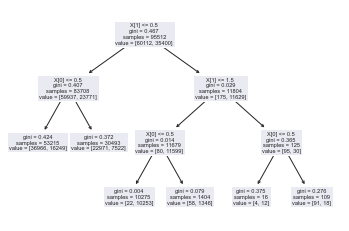

In [28]:
a=tree.plot_tree(classifier)